In [14]:
# 📚 Import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# ✅ Manually defined basic English stopwords (no NLTK)
basic_stopwords = set("""
a about above after again against all am an and any are as at be because been
before being below between both but by could did do does doing down during each
few for from further had has have having he her here hers herself him himself
his how i if in into is it its itself just me more most my myself no nor not
of off on once only or other our ours ourselves out over own same she should so
some such than that the their theirs them themselves then there these they this
those through to too under until up very was we were what when where which while
who whom why will with you your yours yourself yourselves
""".split())

In [16]:
# 📂 Load your dataset
df = pd.read_csv("iphone.csv")
print(df.head())

  productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/

In [17]:
# 🔁 Convert rating to sentiment
def map_sentiment(score):
    if score >= 4:
        return "positive"
    elif score <= 2:
        return "negative"
    else:
        return "neutral"

In [18]:
df['sentiment'] = df['ratingScore'].apply(map_sentiment)
df = df[df['sentiment'] != 'neutral']  # Remove neutral

In [19]:
# 🧹 Clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in basic_stopwords]
    return " ".join(tokens)

In [20]:
df['clean_review'] = df['reviewDescription'].apply(clean_text)

In [21]:
# 🧠 TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment']

In [22]:
# 🎯 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 🤖 Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# 📊 Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8654867256637168

Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.51      0.66       146
    positive       0.85      0.99      0.92       419

    accuracy                           0.87       565
   macro avg       0.90      0.75      0.79       565
weighted avg       0.88      0.87      0.85       565



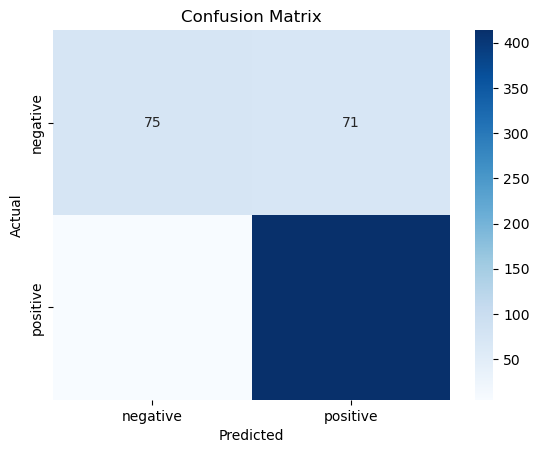

In [25]:
# 🔍 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()